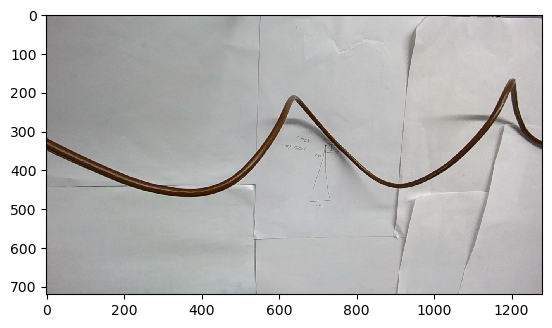

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from realsense_img import ros_camera

rl_cam = ros_camera(node_name='blue_wire')
# Apply histogram equalization
image = rl_cam.get_image()

plt.imshow(image)
plt.show()


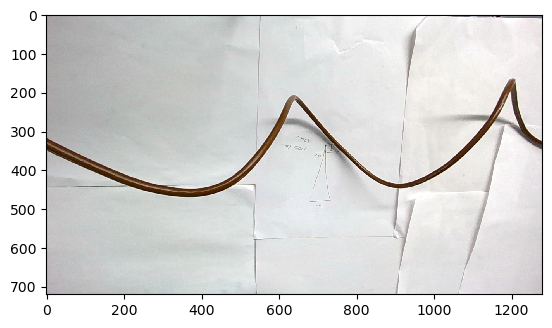

In [2]:
# define the contrast and brightness value
contrast = 1.2 # Contrast control ( 0 to 127)
brightness = 0. # Brightness control (0-100)

out = cv2.addWeighted( image, contrast, image, 0, brightness)
plt.imshow(out)
plt.show()

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
whale_hsv = cv2.cvtColor(out, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(whale_hsv)

pixel_colors = whale_hsv.reshape((np.shape(whale_hsv)[0]*np.shape(whale_hsv)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

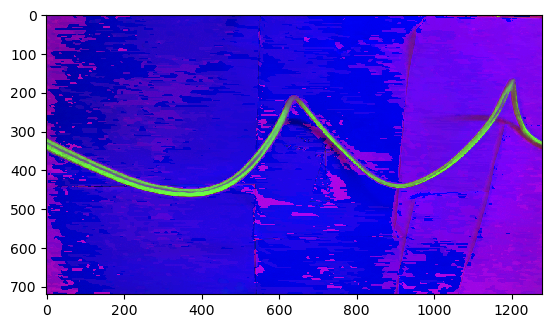

In [4]:
h, s, v = cv2.split(whale_hsv)

plt.imshow(whale_hsv)
plt.show()

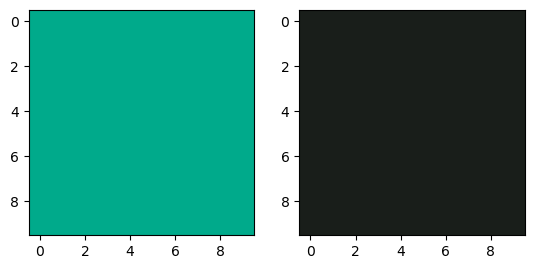

In [17]:
lower_blue = np.array([99, 40, 30], dtype=np.uint8)
upper_blue = np.array([120, 255, 170], dtype=np.uint8)

from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

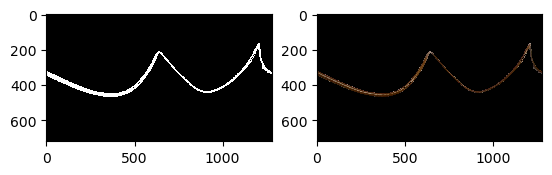

In [32]:
# hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(whale_hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(out, out, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()


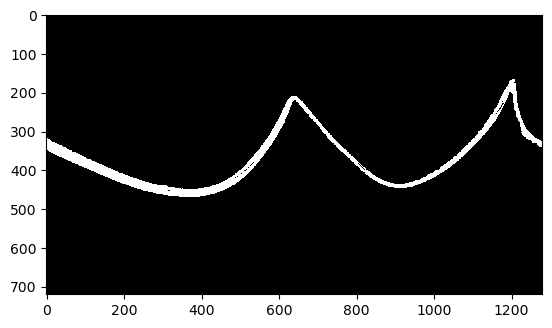

In [34]:
gray_image = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
(thresh, binary_image) = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

# Convert the result to a binary image
_, binary_result = cv2.threshold(cv2.cvtColor(result, cv2.COLOR_RGB2GRAY), 1, 255, cv2.THRESH_BINARY)
binary_result[binary_result > 0] = 255
# Display the images
plt.imshow(binary_result, cmap="gray")

plt.show()

kernel: [[0 1 0]
 [1 1 1]
 [0 1 0]]


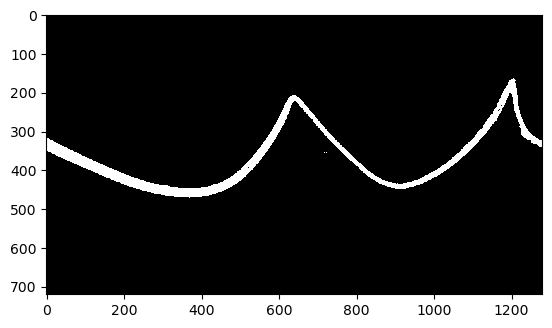

In [35]:
# Create a structuring element (3x3 kernel)
# Create a custom structuring element (cross-shaped kernel)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
print('kernel:', kernel)
# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
plt.imshow(dilated_image, cmap="gray")

plt.show()

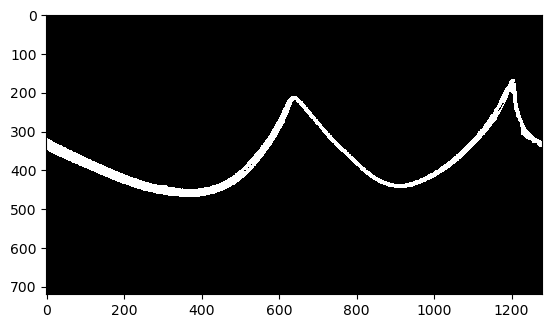

In [36]:
# Apply erosion
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

plt.imshow(eroded_image, cmap='gray')

plt.show()

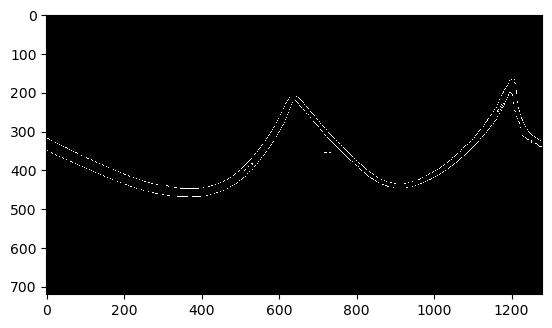

In [39]:
# Image preprocessing
blurred = cv2.GaussianBlur(eroded_image, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges, cmap='gray')

plt.show()

Estimated width of the wire: 1280 pixels
Estimated width of the wire: 1280 pixels


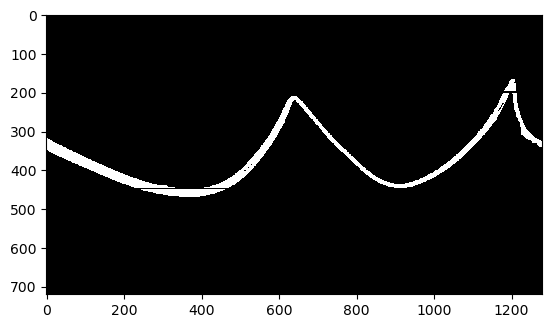

In [45]:
# Contour detection
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print('contours', contours)
# Filter contours based on area
min_area_threshold = 100  # Adjust as needed
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]

# Measure the width of the wire
for cnt in filtered_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    # Draw the bounding box on the original image
    cv2.rectangle(eroded_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Print the width
    print(f"Estimated width of the wire: {w} pixels")
# print(eroded_image)
plt.imshow(eroded_image, cmap='gray')
plt.show()